In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# 성일정보고등학교 학생 107명에게<br>설문을 통해 받은 교복에 대한 생각을
- # SKD 라는 변수로 저장했습니다.

In [2]:
SKD = pd.read_csv('0급-기밀파일.csv', encoding='cp949')

In [3]:
plt.rc('font', family='Malgun Gothic')

- 데이터 한글이기 때문에 encoding을 하고<br>폰트 패밀리를 지정해 주었습니다.

In [4]:
len(SKD) #107명의 학생의 생각과 의견을 받았습니다.

107

In [5]:
SKD.head(1)

,타임스탬프,교복 단어,성별,학년,교복 착용,입는 이유,안 입는 이유,디자인이 별로인 것,교복 필요성,필요 이유,불필요 이유,입기 싫은 요일,사복 착용
0,2023. 10. 26 오후 2:08:13,학생,남,2학년,네,학교에서 입으라고 합니다,불편합니다,바지,필요하다고 생각합니다,늙으면 입을 수 없어서,NaN,화,아니오


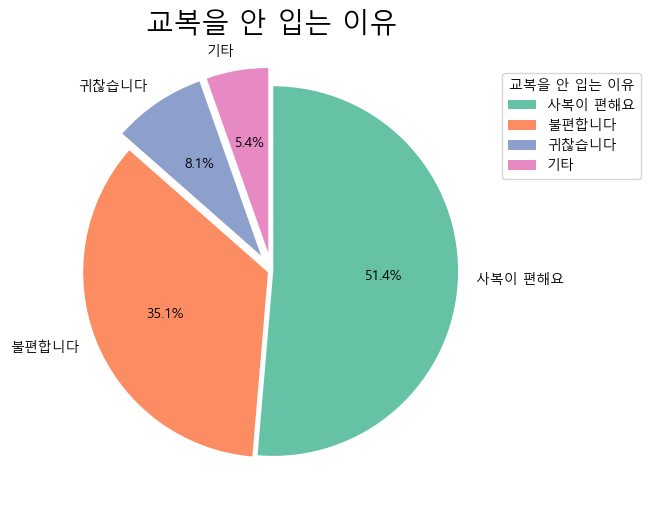

In [81]:
plt.figure(figsize=(10,6))
explode=[0.01,0.02,0.1,0.1]
labels=['사복이 편해요','불편합니다','귀찮습니다','기타']
plt.pie(SKD['안 입는 이유'].value_counts(),
        labels=labels,
        autopct='%.1f%%',
        counterclock=False,
        startangle=90,
        explode=explode,
       )
plt.title('교복을 안 입는 이유', size=20)
plt.legend(loc=(1, 0.7),title = '교복을 안 입는 이유')
plt.show()

# 학생들은 교복을 얼마나 중요하게 생각할까요?

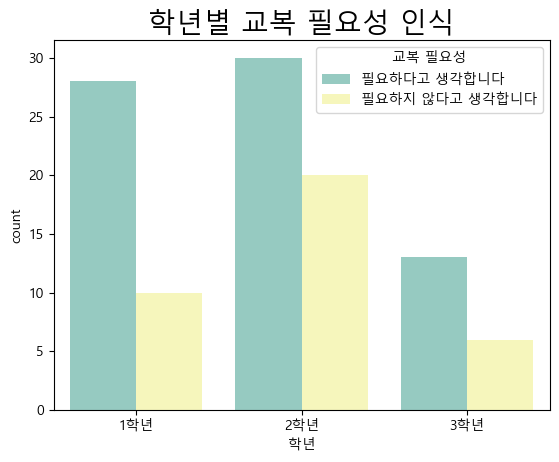

In [6]:
sns.set_palette('Set3')
sns.countplot(data=SKD, x='학년', hue='교복 필요성', order=['1학년','2학년','3학년'])
plt.title('학년별 교복 필요성 인식', fontsize=20)
plt.show()

# 교복을 얼마나 잘 입을까요?

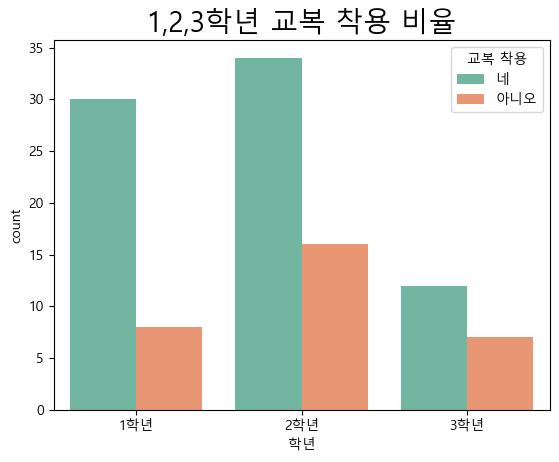

In [7]:
sns.set_palette('Set2')
sns.countplot(data=SKD, x='학년', hue='교복 착용', order=['1학년','2학년','3학년'])
plt.title('1,2,3학년 교복 착용 비율', fontsize=20)
plt.show()

# 평일 중 몇 요일에 가장 안 입을까요?

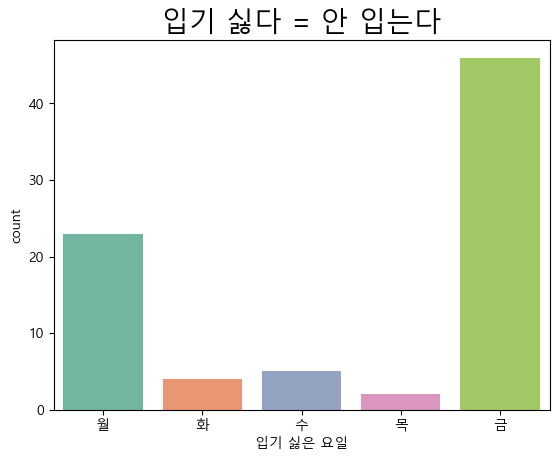

In [61]:
sns.set_palette('Set2')
sns.countplot(data=SKD, x='입기 싫은 요일', order=['월','화','수','목','금'])
plt.title('입기 싫다 = 안 입는다', fontsize=20)
plt.show()

- 금요일에는 친구들이랑 놀기 위해 교복을 잘 안입고 싶은거 같다

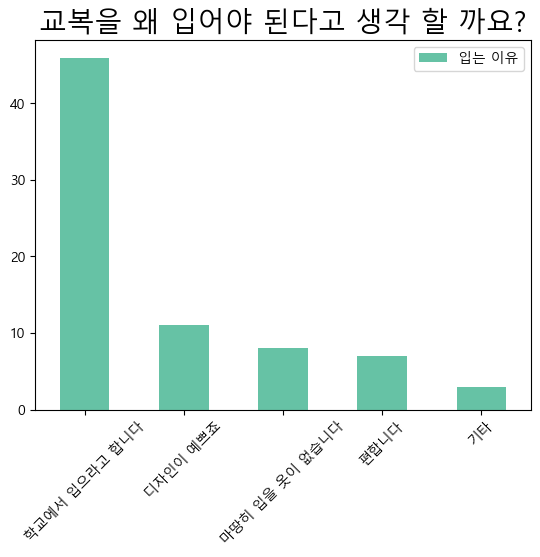

In [62]:
SKD['입는 이유'].value_counts().plot(kind='bar')
plt.title('교복을 왜 입어야 된다고 생각 할 까요?', size=20)
plt.xticks(rotation=45)
plt.legend()
plt.show()

# 워드클라우드

In [9]:
!pip install wordcloud

In [14]:
from wordcloud import WordCloud
from string import digits
import re
from PIL import Image

font_path = 'C:/Windows/Fonts/malgun.ttf' # 글꼴 지정
plt.rc('font',family='Malgun Gothic') # 그래프 한글 패치

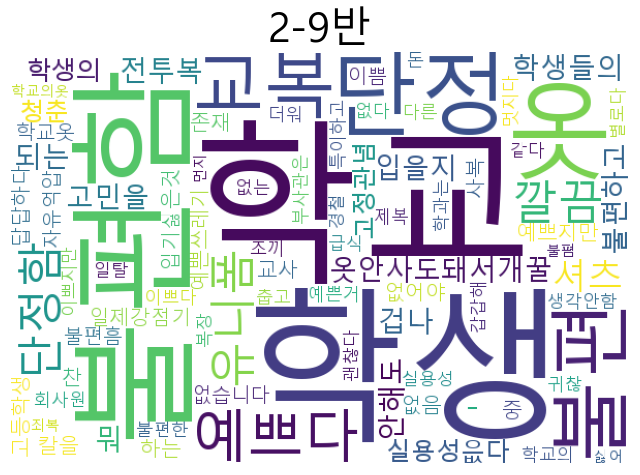

In [19]:
text = ''
with open("교복 하면 떠오르는 것.txt", "r", encoding="utf-8") as f:
    lines = f.readlines()
    for line in lines:
        text += line
        
text = re.sub(r'[0-9]+','',text)

wc = WordCloud(font_path=font_path, background_color='white',
               width=600, height=400)

wc.generate(text)
plt.figure(figsize=(8,8))
plt.imshow(wc)
plt.title('2-9반', size=30)
plt.axis('off')
plt.show()